In [1]:
# Import libraries
import pandas as pd
import numpy as np

from models.DecisionTree import DecisionTree
from models.random_forest import RandomForestClassifier
from models.AdaBoostClassifer import AdaBoostClassifier
from models.LogisticRegression import LogisticRegression
from models.KNNClassifier import KNNClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# Import the dataset
df = pd.read_csv('org_dataset.csv')
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## Exploratory Data Analysis

In [3]:
df.shape

(12684, 26)

In [4]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [5]:
df.occupation.unique().shape

(25,)

Plot the grouped bar charts for each column - Count vs Label colored by Y

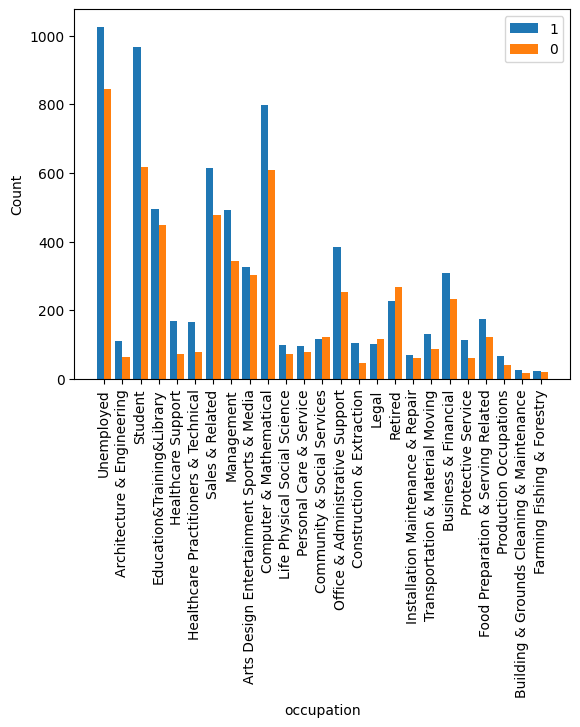

In [183]:
#education, occupation, income, car

import matplotlib.pyplot as plt
import numpy as np

column = 'occupation'

unique_values = df[column].unique()

x = np.arange(unique_values.shape[0])

y1 = [ df[(df['Y'] == 1) & (df[column] == v)].shape[0] for v in unique_values ]
y0 = [ df[(df['Y'] == 0) & (df[column] == v)].shape[0] for v in unique_values ]
width = 0.4

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y0, width)

plt.xticks(x, df[column].unique(), rotation=90)
plt.xlabel(column)
plt.ylabel('Count')

plt.legend([1, 0])
plt.show()

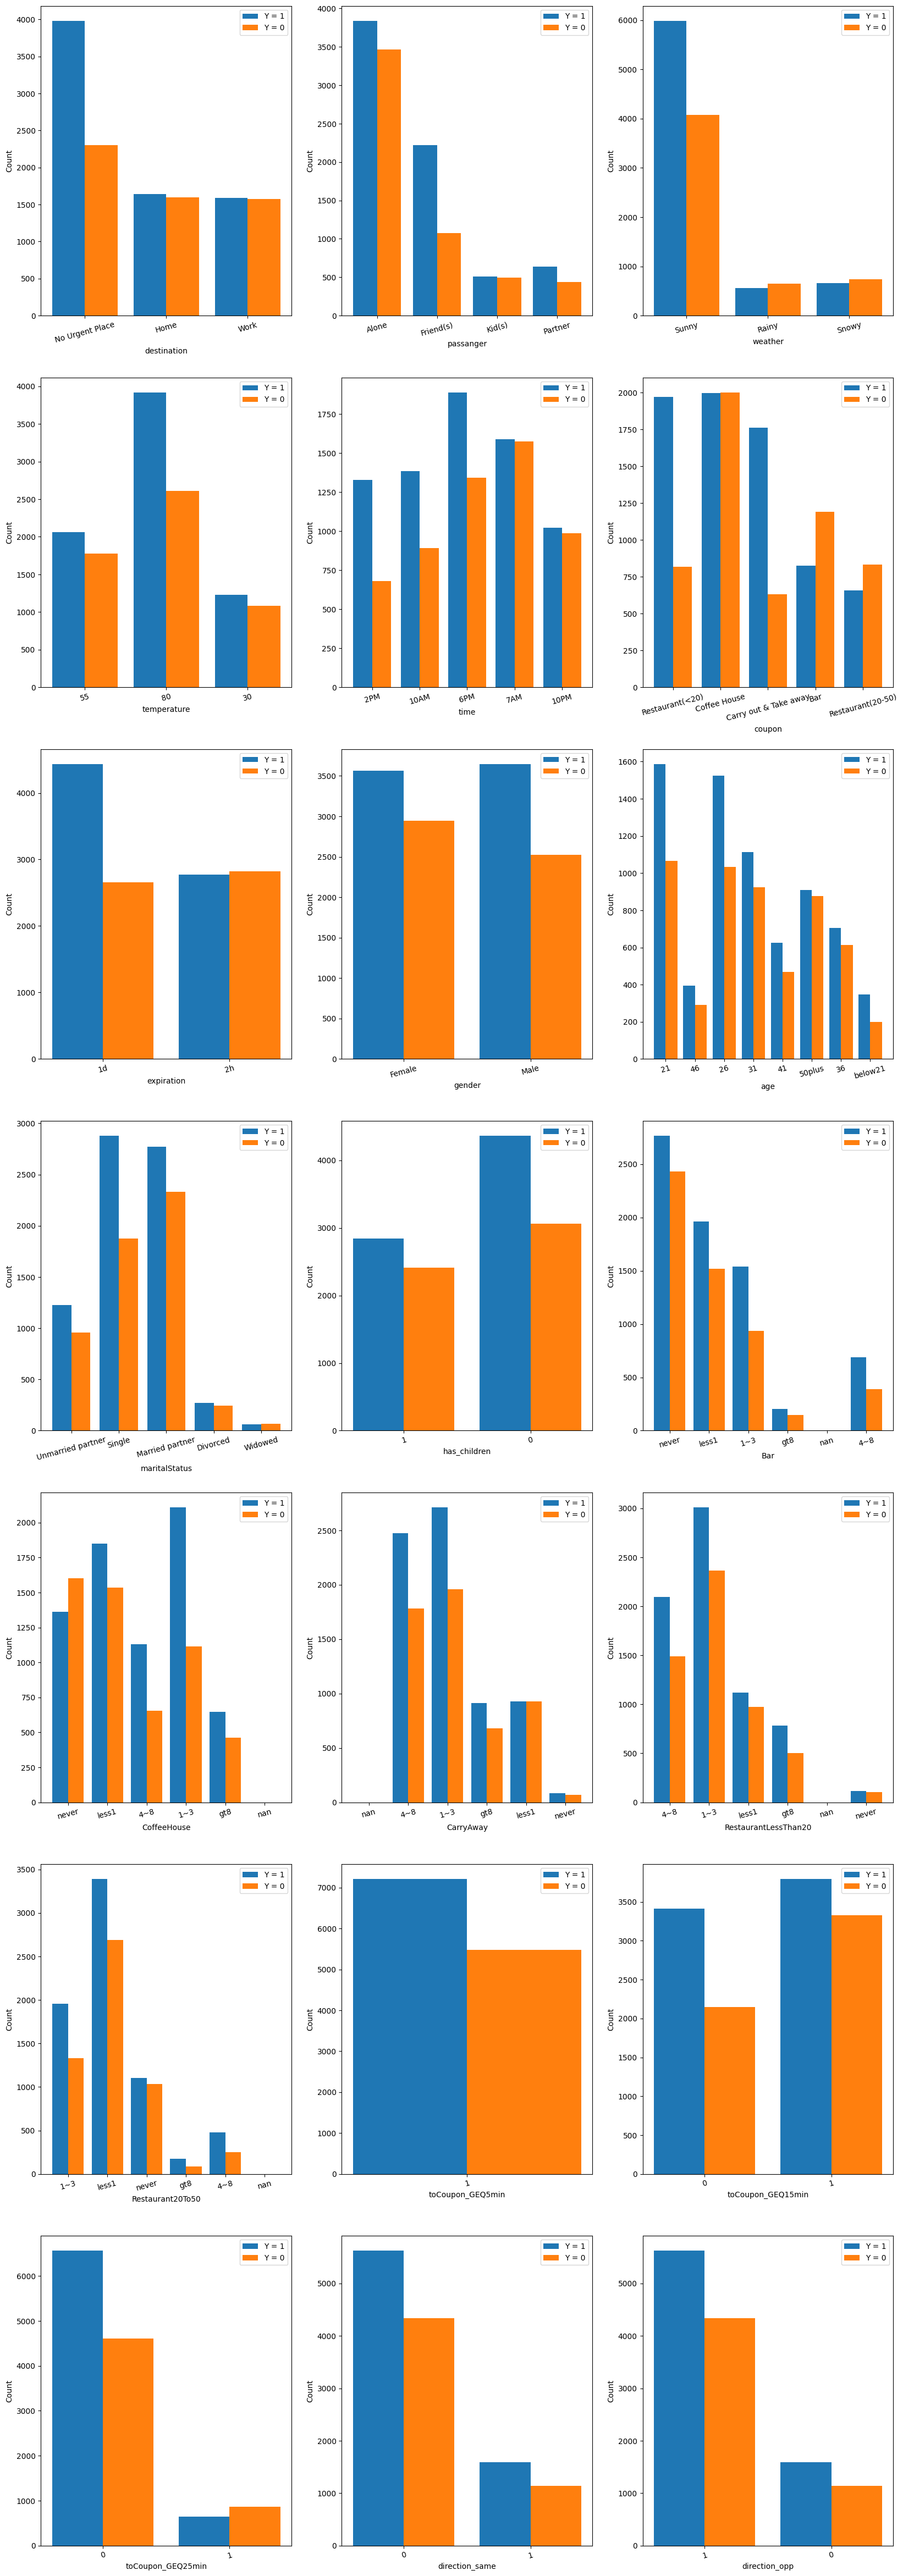

In [155]:
#fig, ax = plt.subplots(nrows=9, ncols=3, sharey=True, figsize=(20,60))
fig, ax = plt.subplots(nrows=7, ncols=3, sharey=False, figsize=(20,60))

columns = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp']

column_counter = 0

for row in ax:
    for col in row:
        if column_counter > 25:
            break

        c = columns[column_counter]

        unique_values = df[c].unique()

        x = np.arange(unique_values.shape[0])

        y1 = [ df[(df['Y'] == 1) & (df[c] == v)].shape[0] for v in unique_values ]
        y0 = [ df[(df['Y'] == 0) & (df[c] == v)].shape[0] for v in unique_values ]
        width = 0.4

        col.bar(x-0.2, y1, width)
        col.bar(x+0.2, y0, width)

        col.set_xticks(x, unique_values, rotation=15)
        col.set_xlabel(c)
        col.set_ylabel('Count')
        col.legend(['Y = 1', 'Y = 0'])

        column_counter += 1

plt.show()

Plot the cardinarities of each column

In [170]:
s = pd.Series([ df[c].unique().shape[0] for c in df.columns[:-1] ])
s

0      3
1      4
2      3
3      3
4      5
5      5
6      2
7      2
8      8
9      5
10     2
11     6
12    25
13     9
14     6
15     6
16     6
17     6
18     6
19     6
20     1
21     2
22     2
23     2
24     2
dtype: int64

In [171]:
s.index = df.columns[:-1]
s

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      6
Bar                      6
CoffeeHouse              6
CarryAway                6
RestaurantLessThan20     6
Restaurant20To50         6
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
dtype: int64

In [172]:
s.sort_values(ascending = False, inplace = True)

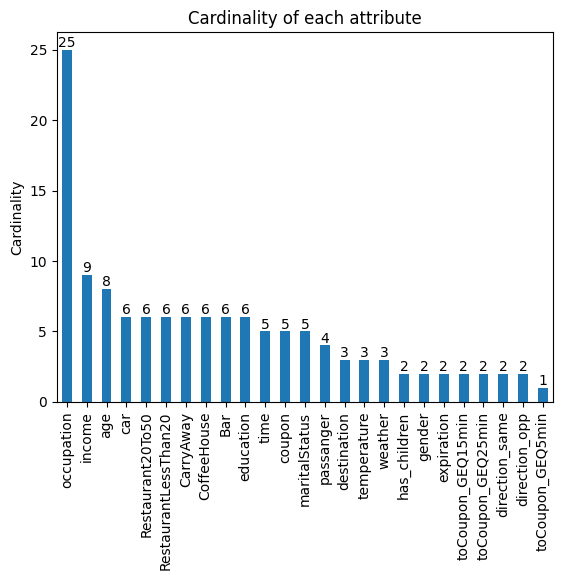

In [179]:
ax = s.plot.bar()
ax.set_ylabel('Cardinality')
ax.set_title('Cardinality of each attribute')

ax.bar_label(ax.containers[0]);

In [7]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

## Data Pre-processing

Drop the 'car' feature.

In [3]:
df.drop(columns='car', inplace=True)

In [4]:
df.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

The features Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50 still have missing values.

In [5]:
df_noNull = df[(df.Bar.notnull()) & (df.CoffeeHouse.notnull()) & (df.CarryAway.notnull()) & (df.RestaurantLessThan20.notnull()) & (df.Restaurant20To50.notnull())]
df_noNull.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [6]:
columns_imputation = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']

x_imputation = df_noNull[columns_imputation]

# Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50
y_Bar = df_noNull.Bar
y_CoffeeHouse = df_noNull.CoffeeHouse
y_CarryAway = df_noNull.CarryAway
y_RestaurantLessThan20 = df_noNull.RestaurantLessThan20
y_Restaurant20To50 = df_noNull.Restaurant20To50

In [160]:
y_arrays = [y_Bar, y_CoffeeHouse, y_CarryAway, y_RestaurantLessThan20, y_Restaurant20To50]
features_null = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
max_depths = [3, 5, 8, 10, 12]
#max_depths = [5]
# x...15,14,13

train_accuracy = []
train_weighted_avg_precision = []
train_weighted_avg_recall = []
test_accuracy = []
test_weighted_avg_precision = []
test_weighted_avg_recall = []
n_max_depth = []
feature = []

for d in max_depths:
    for i, f in enumerate(features_null):
        #print("======", d, f, "======")

        n_max_depth.append(d)
        feature.append(f)

        x_train, x_test, y_train, y_test = train_test_split(x_imputation, y_arrays[i], test_size = 0.2, random_state=11)

        dt_model = DecisionTree(min_samples_split=3, max_depth=d, classifier=True, column_names=list(x_train.columns))
        dt_model.fit(x_train.to_numpy(), y_train.values.reshape(-1,1))

        y_hat = dt_model.predict(x_train.to_numpy())
        report = classification_report(y_train, y_hat, output_dict=True, zero_division=0)
        train_accuracy.append(report['accuracy'])
        train_weighted_avg_precision.append(report['weighted avg']['precision'])
        train_weighted_avg_recall.append(report['weighted avg']['recall'])

        y_hat = dt_model.predict(x_test.to_numpy())
        report = classification_report(y_test, y_hat, output_dict=True, zero_division=0)
        test_accuracy.append(report['accuracy'])
        test_weighted_avg_precision.append(report['weighted avg']['precision'])
        test_weighted_avg_recall.append(report['weighted avg']['recall'])


# n_max_depth
pd.DataFrame({'max_depth': n_max_depth, 'feature': feature, 'train_accuracy': train_accuracy, 'train_weighted_avg_precision': train_weighted_avg_precision, 'train_weighted_avg_recall': train_weighted_avg_recall, 'test_accuracy': test_accuracy, 'test_weighted_avg_precision': test_weighted_avg_precision, 'test_weighted_avg_recall': test_weighted_avg_recall})


====== 3 Bar ======
====== 3 CoffeeHouse ======
====== 3 CarryAway ======
====== 3 RestaurantLessThan20 ======
====== 3 Restaurant20To50 ======
====== 5 Bar ======
====== 5 CoffeeHouse ======
====== 5 CarryAway ======
====== 5 RestaurantLessThan20 ======
====== 5 Restaurant20To50 ======
====== 8 Bar ======
====== 8 CoffeeHouse ======
====== 8 CarryAway ======
====== 8 RestaurantLessThan20 ======
====== 8 Restaurant20To50 ======
====== 10 Bar ======
====== 10 CoffeeHouse ======
====== 10 CarryAway ======
====== 10 RestaurantLessThan20 ======
====== 10 Restaurant20To50 ======
====== 12 Bar ======
====== 12 CoffeeHouse ======
====== 12 CarryAway ======
====== 12 RestaurantLessThan20 ======
====== 12 Restaurant20To50 ======


,max_depth,feature,train_accuracy,train_weighted_avg_precision,train_weighted_avg_recall,test_accuracy,test_weighted_avg_precision,test_weighted_avg_recall
0,3,Bar,0.483804,0.445973,0.483804,0.484272,0.436396,0.484272
1,3,CoffeeHouse,0.334161,0.407162,0.334161,0.343129,0.401459,0.343129
2,3,CarryAway,0.457415,0.504599,0.457415,0.453642,0.480708,0.453642
3,3,RestaurantLessThan20,0.484736,0.448901,0.484736,0.505795,0.451259,0.505795
4,3,Restaurant20To50,0.518783,0.542653,0.518783,0.512417,0.521972,0.512417
5,5,Bar,0.581496,0.598282,0.581496,0.579470,0.591047,0.579470
6,5,CoffeeHouse,0.462900,0.483292,0.462900,0.469785,0.482226,0.469785
7,5,CarryAway,0.549519,0.567049,0.549519,0.538907,0.562524,0.538907
8,5,RestaurantLessThan20,0.576219,0.613344,0.576219,0.569536,0.588173,0.569536
9,5,Restaurant20To50,0.576426,0.621755,0.576426,0.573675,0.619546,0.573675


### For loop

In [7]:
y_arrays = [y_Bar, y_CoffeeHouse, y_CarryAway, y_RestaurantLessThan20, y_Restaurant20To50]
features_null = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

n_max_depth = 12

for i, f in enumerate(features_null):
    x_train, x_test, y_train, y_test = train_test_split(x_imputation, y_arrays[i], test_size = 0.2, random_state=11)

    dt_model = DecisionTree(min_samples_split=3, max_depth=n_max_depth, classifier=True, column_names=list(x_train.columns))
    dt_model.fit(x_train.to_numpy(), y_train.values.reshape(-1,1))

    #y_hat = dt_model.predict(x_train.to_numpy())
    #print(classification_report(y_train, y_hat))

    y_hat = dt_model.predict(x_test.to_numpy())
    print(classification_report(y_test, y_hat))

    x_ = df[df[f].isnull()][columns_imputation]
    print(x_.shape)

    y_hat_ = dt_model.predict(x_.to_numpy())

    df.loc[df[f].isnull(), f] = y_hat_

    print(df.isnull().sum())

              precision    recall  f1-score   support

         1~3       0.98      0.85      0.91       449
         4~8       0.91      0.86      0.89       220
         gt8       1.00      1.00      1.00        65
       less1       0.91      0.98      0.94       676
       never       0.95      0.97      0.96      1006

    accuracy                           0.94      2416
   macro avg       0.95      0.93      0.94      2416
weighted avg       0.94      0.94      0.94      2416

(107, 19)
destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                       0
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    1

### Misc.

Decision Tree for feature selection

Main: Random Forest, AdaBoost

Exploration: Logistic Regression, KNN
- How to handle missing values
    - Use DT to predict missing values
- Measure the time for training and prediction
 
More:
- Model Selection...? Subset, Forward, Backward...
- Lasso/Ridge, Adaboost...?, SVM

In [8]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [10]:
x = df.loc[:10, ['time', 'coupon', 'passanger', 'temperature']]
y = df.loc[:10, 'Y']

# Build the decision tree model and print it
classifier = DecisionTree(min_samples_split=3, max_depth=2, classifier=True, column_names=list(x.columns))
classifier.fit(x, y.values.reshape(-1,1))
classifier.print_tree()

y_hat = classifier.predict(x)

acc = accuracy(y, y_hat)
print("Accuracy:", round(acc,4))

X_coupon <= Coffee House ? 0.15112160566706018
    left:X_coupon <= Carry out & Take away ? 0.27551020408163274
        left:X_coupon <= Bar ? 0.375
                left:0
                right:1
        right:0
    right:1


ValueError: ('Lengths must match to compare', (11,), (4,))

In [11]:
x = df.loc[:10, ['time', 'coupon', 'passanger', 'temperature']]
y = df.loc[:10, 'Y']

rfModel = RandomForestClassifier(min_samples_split=2, max_depth=3, n_trees=3)
rfModel.fit(x.to_numpy(), y.to_numpy())

y_hat = rfModel.predict(x.to_numpy())

acc = accuracy(y, y_hat)
print("Accuracy:", round(acc,4))

Accuracy: 0.8182


/Users/tomokikyotani/Local/NU/Fall2022_local/IE7300/in-vehicle-coupon-recommendation/models/decisiontrees/treeclassifier.py:64: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return(stats.mode(D[:,-1])[0])
/Users/tomokikyotani/Local/NU/Fall2022_local/IE7300/in-vehicle-coupon-recommendation/models/random_forest/abstract/base_randomforest.py:123: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is ta

In [12]:
x = df.loc[:10, ['time', 'coupon', 'passanger', 'temperature']]
y = df.loc[:10, 'Y']

y[y == 0] = -1

# Adaboost classification with 5 weak classifiers
clf = AdaBoostClassifier(n_clf=5)
clf.fit(x.to_numpy(), y)
y_pred = clf.predict(x.to_numpy())

acc = accuracy(y, y_pred)
print("Accuracy:", round(acc,4))

Accuracy: 0.7273


In [7]:
x = df.loc[:10, ['time', 'coupon', 'passanger', 'temperature']]
y = df.loc[:10, 'Y']
x = pd.get_dummies(x)

knn_model = KNNClassifier(K=5, metric='minkowski', p=2)
knn_model.fit(x, y)

y_pred = knn_model.predict(x)

acc = accuracy(y, y_pred)
print("Accuracy:", round(acc,4))

/Users/tomokikyotani/Local/NU/Fall2022_local/IE7300/in-vehicle-coupon-recommendation/models/KNNClassifier.py:158: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred = stats.mode(self.y_train[idx_neighbours],axis=1).mode.flatten()


array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [12]:
fit_logitReg = LogisticRegression(lr=0.001)
fit_logitReg.fit(x, y)
y_pred = fit_logitReg.predict(x)

acc = accuracy(y, y_pred)
print("Accuracy:", round(acc,4))

Accuracy: 0.6364
